In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv(r"C:\Users\fowzi\Downloads\archive\electricity-consumption-india-city-level-2017-19.csv")

In [21]:
df.head(2)

,City,Year,Consumption of Electricity (in lakh units)-Domestic purpose,Consumption of Electricity (in lakh units)-Commercial purpose,Consumption of Electricity (in lakh units)-Industry purpose,Consumption of Electricity (in lakh units)-Public Water Work & Street Light,Consumption of Electricity (in lakh units)-Others,Consumption of Electricity (in lakh units)-Total Consumption
0,Agartala,2018-19,213.98,30.8,5.94,13.13,55.25,319.1
1,Agra,2017-18,9772.00,3811.0,2870.00,583.00,157.00,17191.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 8 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   City                                                                         47 non-null     object 
 1   Year                                                                         46 non-null     object 
 2   Consumption of Electricity (in lakh units)-Domestic purpose                  46 non-null     float64
 3   Consumption of Electricity (in lakh units)-Commercial purpose                46 non-null     float64
 4   Consumption of Electricity (in lakh units)-Industry purpose                  46 non-null     float64
 5   Consumption of Electricity (in lakh units)-Public Water Work & Street Light  46 non-null     float64
 6   Consumption of Electricity (in lakh units)-Ot

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Drop any rows with missing values
df.dropna(inplace=True)

# Selecting features and target variable
X = df[['Consumption of Electricity (in lakh units)-Domestic purpose',
        'Consumption of Electricity (in lakh units)-Commercial purpose',
        'Consumption of Electricity (in lakh units)-Industry purpose',
        'Consumption of Electricity (in lakh units)-Public Water Work & Street Light',
        'Consumption of Electricity (in lakh units)-Others']]
y = df['Consumption of Electricity (in lakh units)-Total Consumption']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 2102618966.9621985
Coefficients: [ 0.05224839  1.23272012  2.5044473   2.27871003 -0.80909011]
Intercept: 703.7857689764569


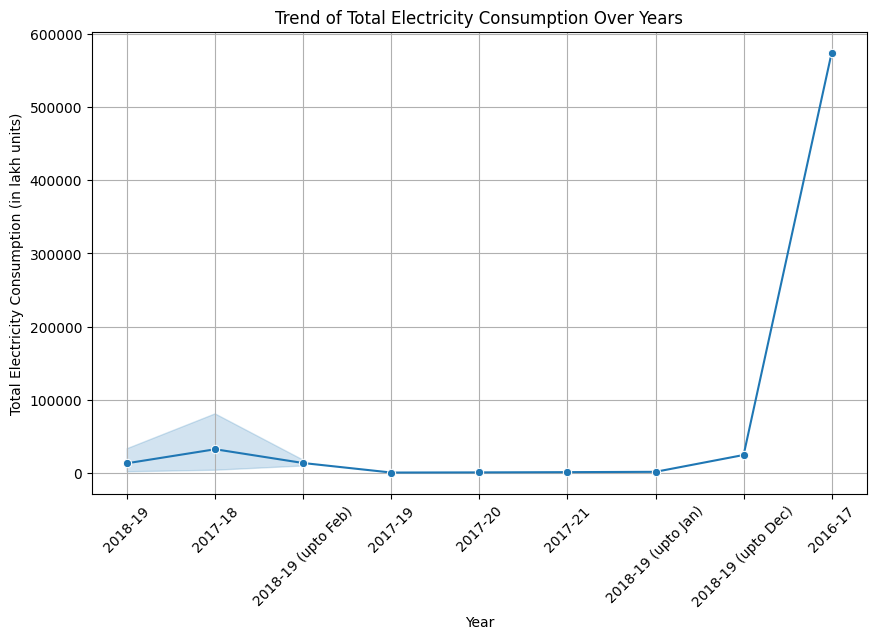

In [24]:
# Line plot showing the trend of total electricity consumption over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Consumption of Electricity (in lakh units)-Total Consumption', marker='o')
plt.title('Trend of Total Electricity Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('Total Electricity Consumption (in lakh units)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

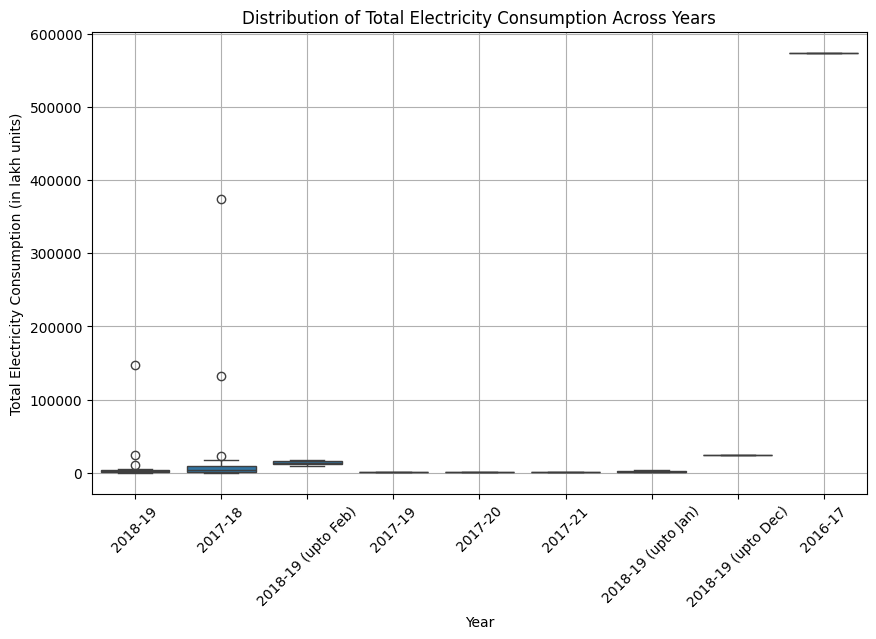

In [25]:
# Box plot showing the distribution of total electricity consumption across different years
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='Consumption of Electricity (in lakh units)-Total Consumption')
plt.title('Distribution of Total Electricity Consumption Across Years')
plt.xlabel('Year')
plt.ylabel('Total Electricity Consumption (in lakh units)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

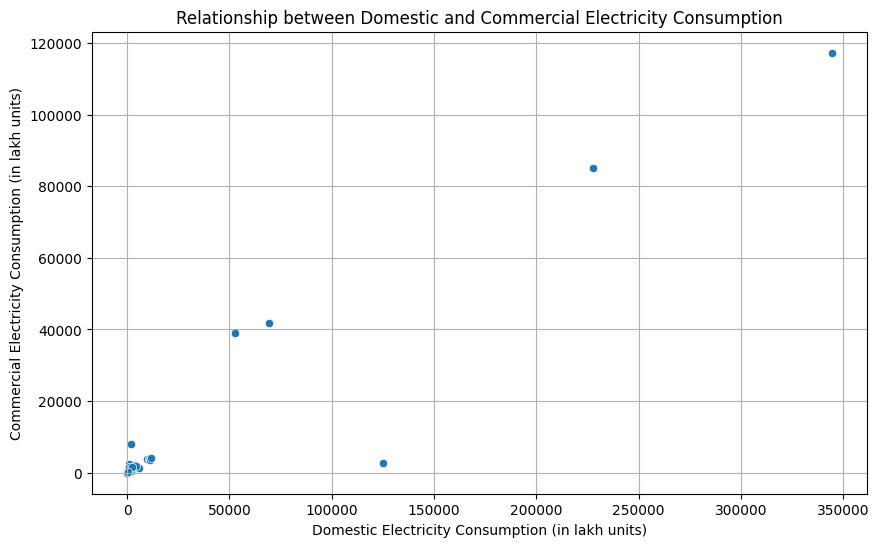

In [26]:
# Scatter plot showing the relationship between domestic and commercial electricity consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Consumption of Electricity (in lakh units)-Domestic purpose', y='Consumption of Electricity (in lakh units)-Commercial purpose')
plt.title('Relationship between Domestic and Commercial Electricity Consumption')
plt.xlabel('Domestic Electricity Consumption (in lakh units)')
plt.ylabel('Commercial Electricity Consumption (in lakh units)')
plt.grid(True)
plt.show()

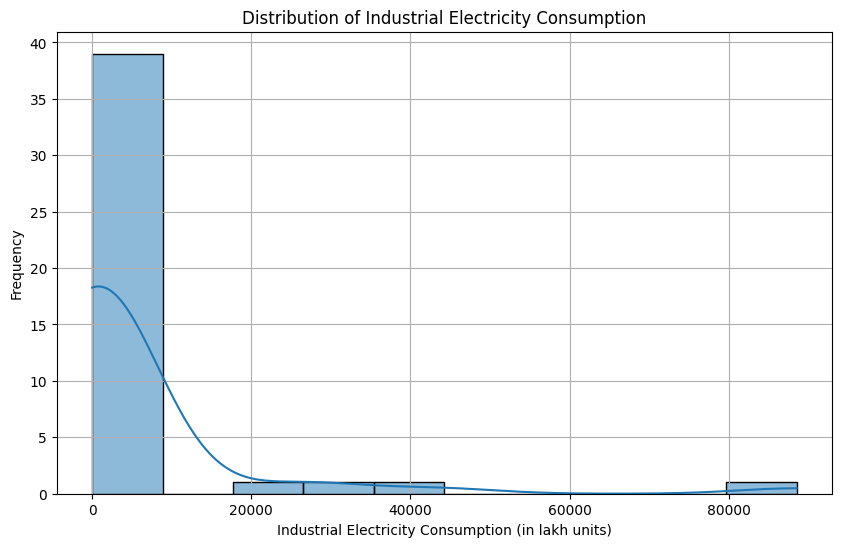

In [27]:
# Histogram showing the distribution of industrial electricity consumption
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Consumption of Electricity (in lakh units)-Industry purpose', bins=10, kde=True)
plt.title('Distribution of Industrial Electricity Consumption')
plt.xlabel('Industrial Electricity Consumption (in lakh units)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

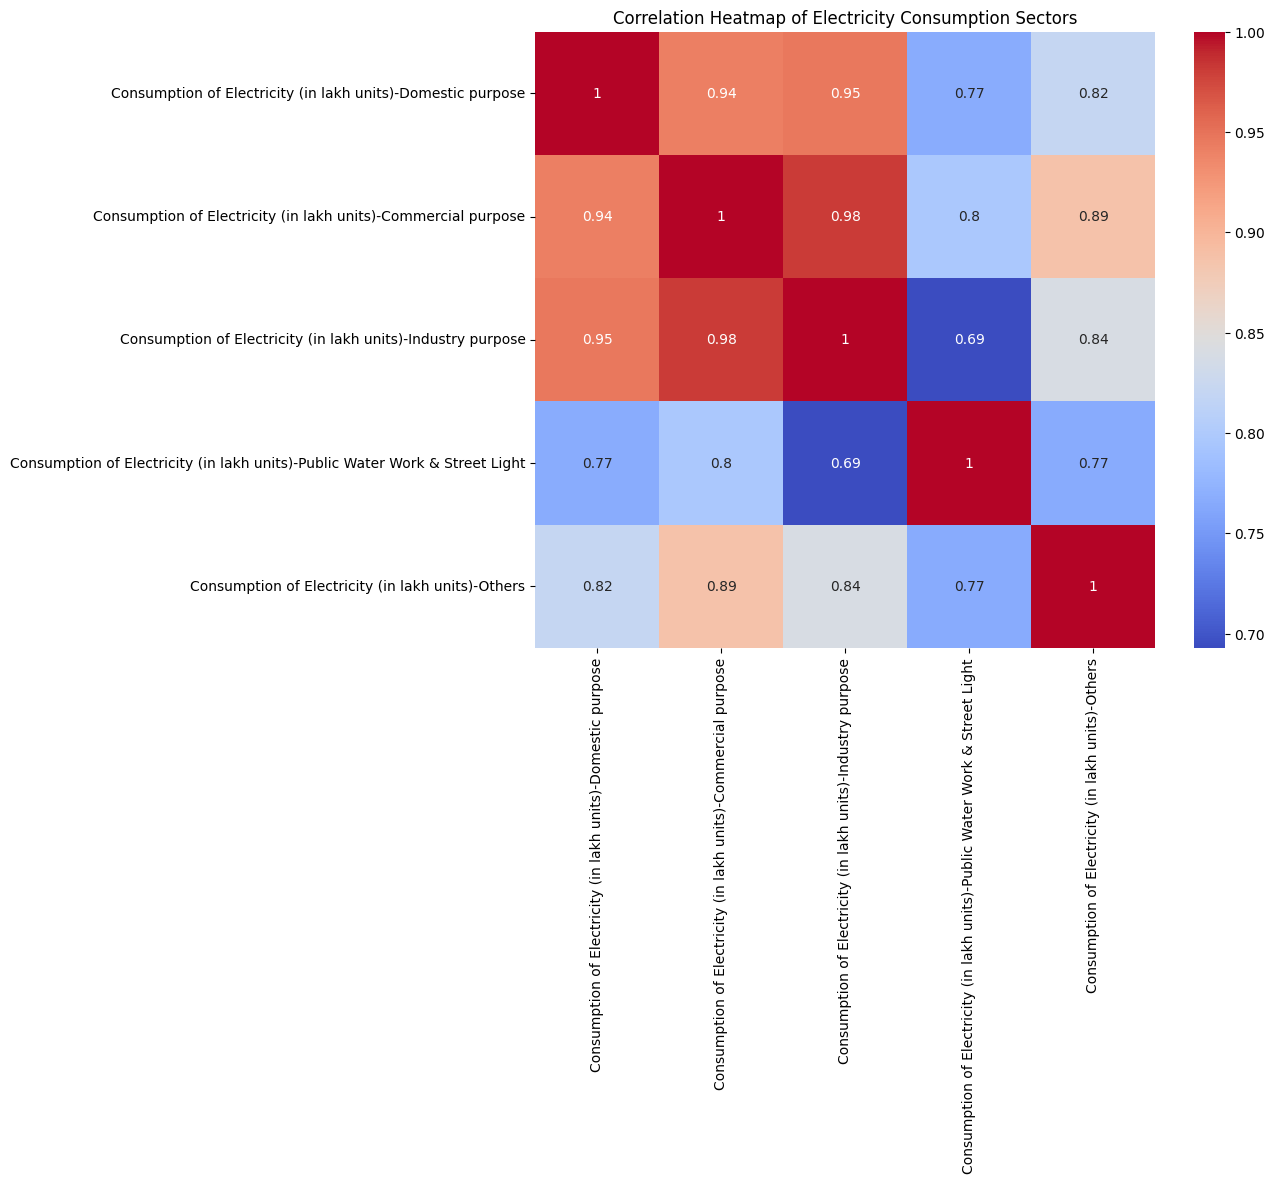

In [28]:
# Heatmap showing the correlation between different sectors of electricity consumption
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Consumption of Electricity (in lakh units)-Domestic purpose',
                'Consumption of Electricity (in lakh units)-Commercial purpose',
                'Consumption of Electricity (in lakh units)-Industry purpose',
                'Consumption of Electricity (in lakh units)-Public Water Work & Street Light',
                'Consumption of Electricity (in lakh units)-Others']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Electricity Consumption Sectors')
plt.show()